In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dfs = []
for i in range(1,5):
    path = 'unsw-nb15/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
combined_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

/tmp/ipykernel_34/632899555.py:4: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
/tmp/ipykernel_34/632899555.py:4: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [3]:
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [4]:
dataset_columns = pd.read_csv('unsw-nb15/NUSW-NB15_features.csv',encoding='ISO-8859-1')
dataset_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [5]:
combined_data.columns = dataset_columns['Name']
combined_data.head(5)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [6]:
combined_data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object', name='Name')

# **--------------------statistical analysis-------------------------**

# Descriptive Statistics:

In [7]:
print(combined_data.describe())


Name            dur        sbytes        dbytes          sttl          dttl  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   6.587916e-01  4.339600e+03  3.642759e+04  6.278197e+01  3.076681e+01   
std    1.392493e+01  5.640599e+04  1.610960e+05  7.462277e+01  4.285089e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.037000e-03  2.000000e+02  1.780000e+02  3.100000e+01  2.900000e+01   
50%    1.586100e-02  1.470000e+03  1.820000e+03  3.100000e+01  2.900000e+01   
75%    2.145545e-01  3.182000e+03  1.489400e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

Name          sloss         dloss         Sload         Dload         Spkts  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   5.163921e+00  1.632944e+01  3.695645e+07  2.450861e+06  3.328884e+01   
std    2.251707e+01  5.659474e+01  1.186043e+08  4.

# Chi-Square Test for Categorical Variables:

In [10]:
from scipy.stats import chi2_contingency

cat_cols = ['proto', 'state', 'service', 'attack_cat']
for col in cat_cols:
    contingency_table = pd.crosstab(combined_data[col], combined_data['Label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {col}: p-value = {p}')


Chi-Square Test for proto: p-value = 0.0
Chi-Square Test for state: p-value = 0.0
Chi-Square Test for service: p-value = 0.0
Chi-Square Test for attack_cat: p-value = 1.0


# T-Test for Continuous Variables:

In [12]:
from scipy.stats import ttest_ind

continuous_cols = ['dur', 'sbytes', 'dbytes', 'Spkts', 'Dpkts']
for col in continuous_cols:
    t_stat, p_value = ttest_ind(combined_data[combined_data['Label'] == 1][col],
                                combined_data[combined_data['Label'] == 0][col])
    print(f'T-Test for {col}: p-value = {p_value}')


T-Test for dur: p-value = 0.001795304798102038
T-Test for sbytes: p-value = 3.339475263125274e-59
T-Test for dbytes: p-value = 0.0
T-Test for Spkts: p-value = 0.0
T-Test for Dpkts: p-value = 0.0


# visualisattions

# Distribution of Attack Categories:

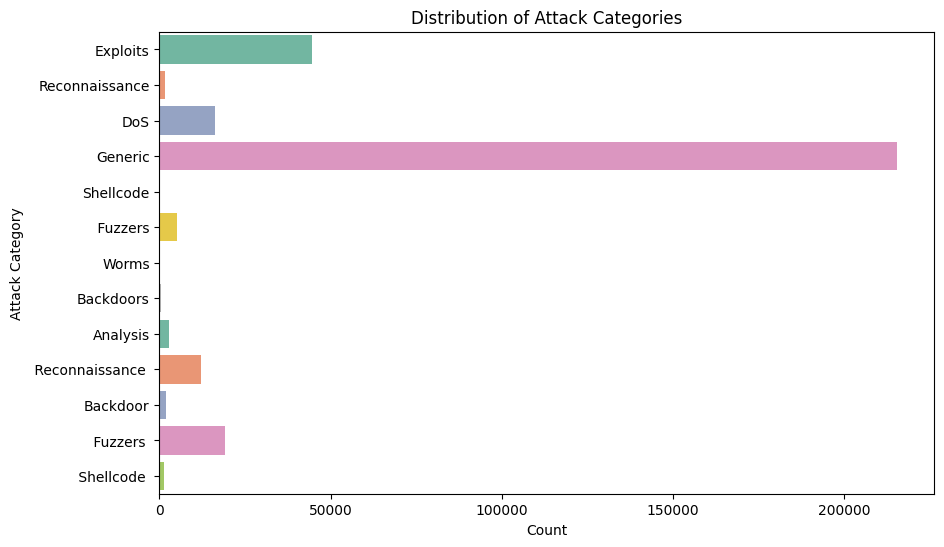

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='attack_cat', data=combined_data, palette='Set2')
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()


Number of unique source IPs with(attack): 4
Some unique source IPs: ['175.45.176.3' '175.45.176.2' '175.45.176.0' '175.45.176.1']


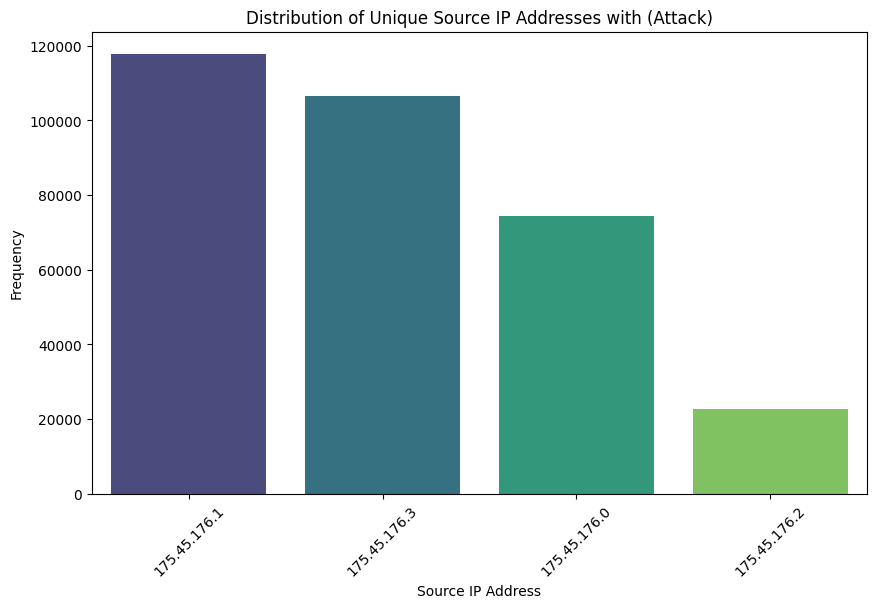

In [53]:

attack_data = combined_data[combined_data['Label'] == 1]

unique_src_ips = attack_data['srcip'].unique()

num_unique_src_ips = len(unique_src_ips)


print(f'Number of unique source IPs with(attack): {num_unique_src_ips}')
print(f'Some unique source IPs: {unique_src_ips[:5]}')
ip_counts = attack_data['srcip'].value_counts()

# Create a DataFrame for plotting
ip_distribution = ip_counts.reset_index()
ip_distribution.columns = ['Source IP', 'Frequency']
plt.figure(figsize=(10, 6))
sns.barplot(x='Source IP', y='Frequency', data=ip_distribution, palette='viridis')
plt.xticks(rotation=45)  # Rotate IP labels for better readability
plt.xlabel('Source IP Address')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Source IP Addresses with (Attack)')
plt.show()

# Distribution of Connection States:



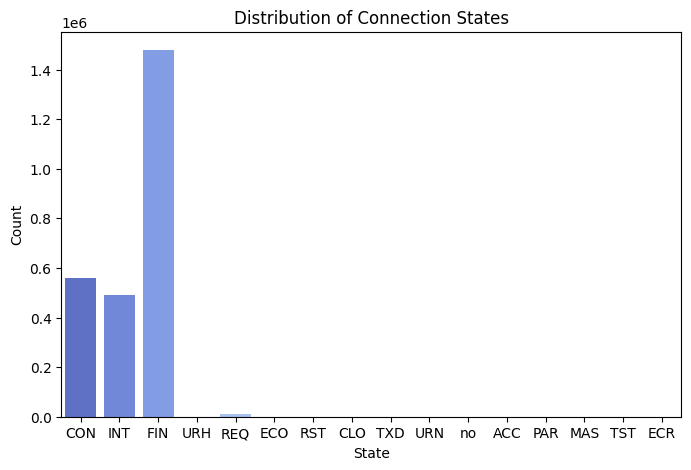

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='state', data=combined_data, palette='coolwarm')
plt.title('Distribution of Connection States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


# Distribution of Duration of Connections:



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


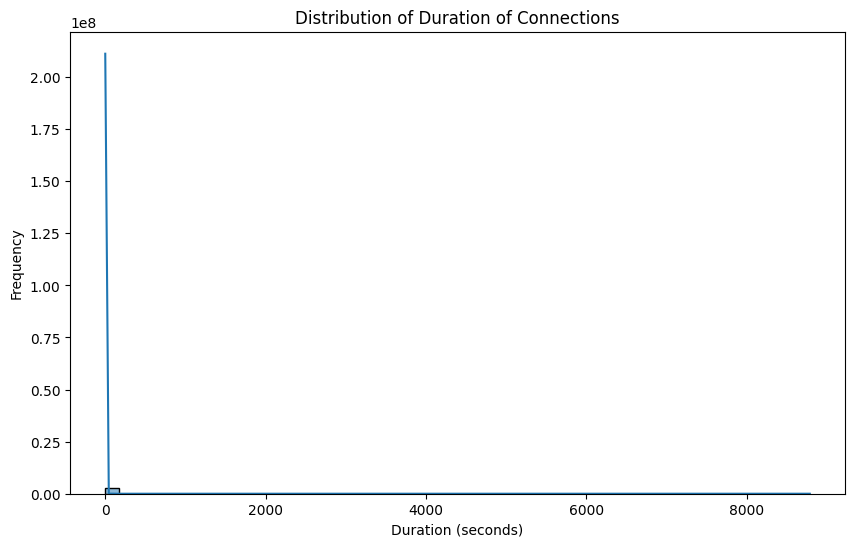

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['dur'], bins=50, kde=True)
plt.title('Distribution of Duration of Connections')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


# Box Plot of Source and Destination Bytes:



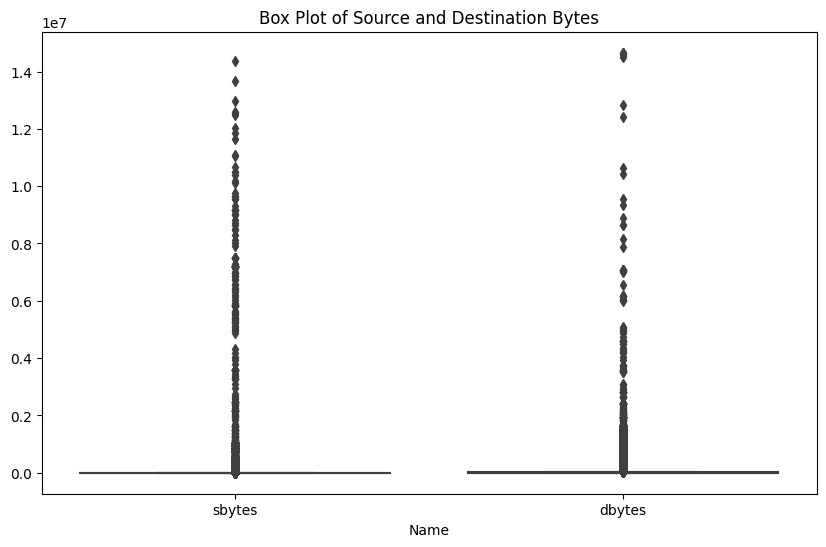

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data[['sbytes', 'dbytes']])
plt.title('Box Plot of Source and Destination Bytes')
plt.show()


# Scatter Plot of Source and Destination Packets:



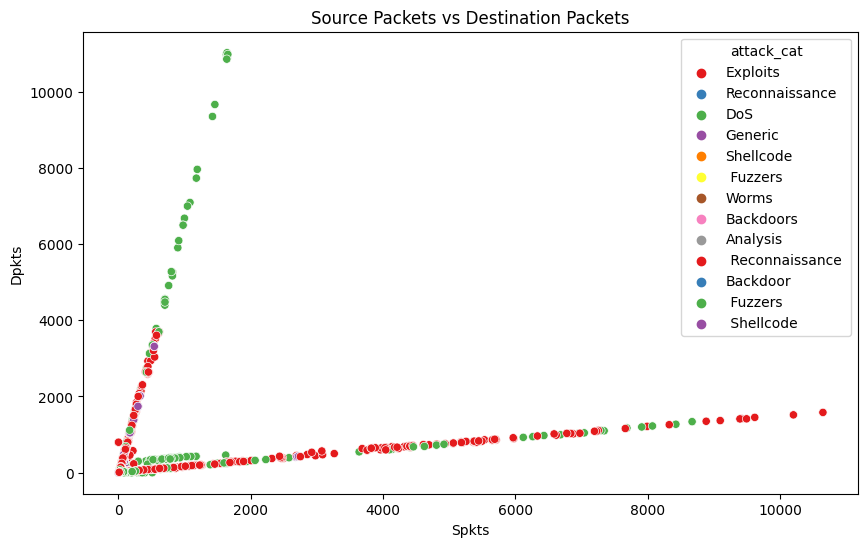

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spkts', y='Dpkts', hue='attack_cat', data=combined_data, palette='Set1')
plt.title('Source Packets vs Destination Packets')
plt.show()


# Heatmap of Correlation between Features:



In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Distribution of Source and Destination TTL:



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


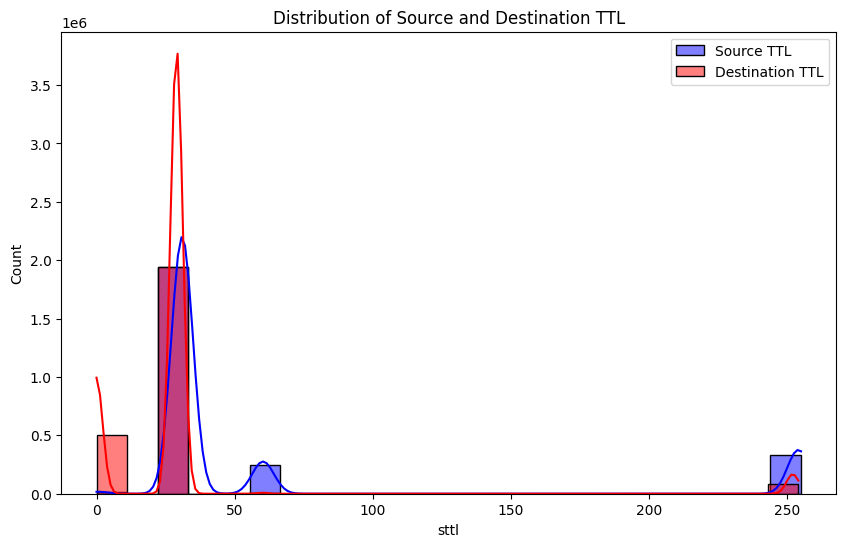

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['sttl'], color='blue', label='Source TTL', kde=True)
sns.histplot(combined_data['dttl'], color='red', label='Destination TTL', kde=True)
plt.legend()
plt.title('Distribution of Source and Destination TTL')
plt.show()


# Box Plot of Source and Destination Jitter:



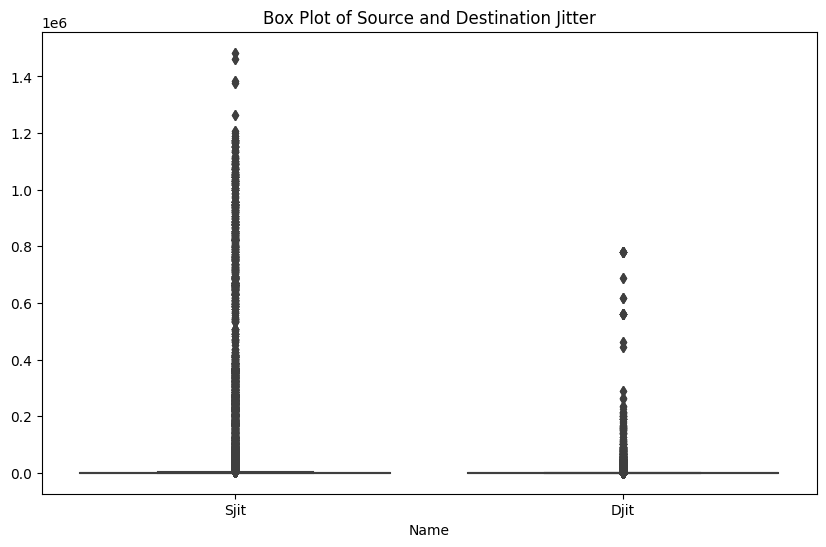

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data[['Sjit', 'Djit']])
plt.title('Box Plot of Source and Destination Jitter')
plt.show()


# Violin Plot of Source and Destination Inter-Packet Time:



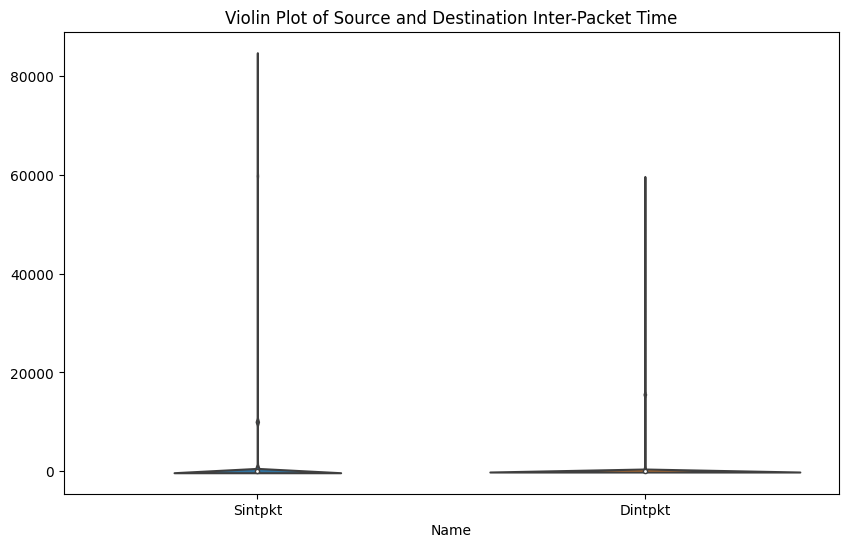

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data[['Sintpkt', 'Dintpkt']])
plt.title('Violin Plot of Source and Destination Inter-Packet Time')
plt.show()


# Box Plot of Bytes by Attack Category:



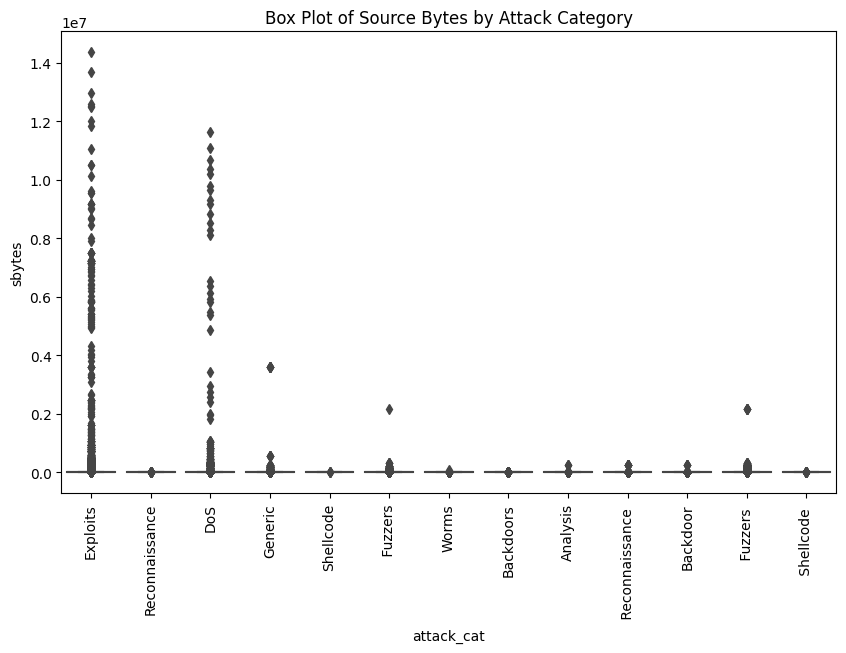

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack_cat', y='sbytes', data=combined_data)
plt.title('Box Plot of Source Bytes by Attack Category')
plt.xticks(rotation=90)
plt.show()


# Density Plot of Connection Duration by Attack Category:



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

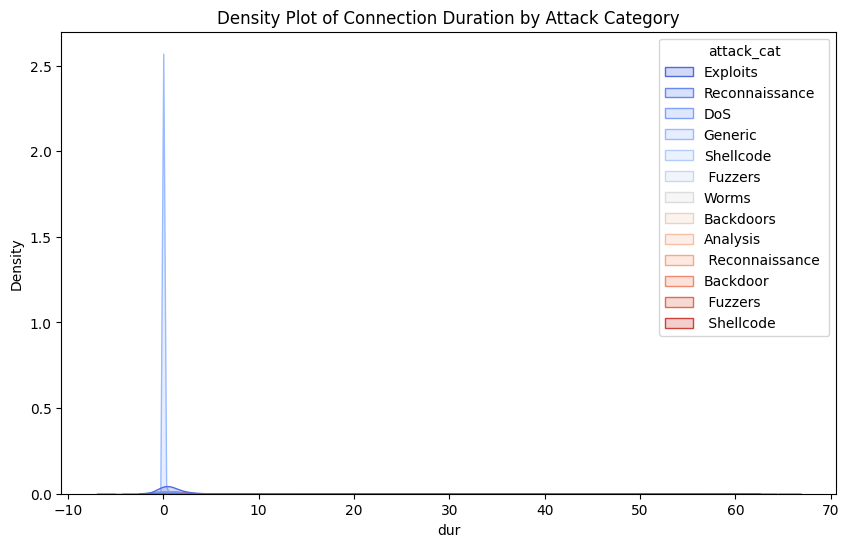

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_data, x='dur', hue='attack_cat', fill=True, palette='coolwarm')
plt.title('Density Plot of Connection Duration by Attack Category')
plt.show()


# FacetGrid of Attack Categories by Protocol:



/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


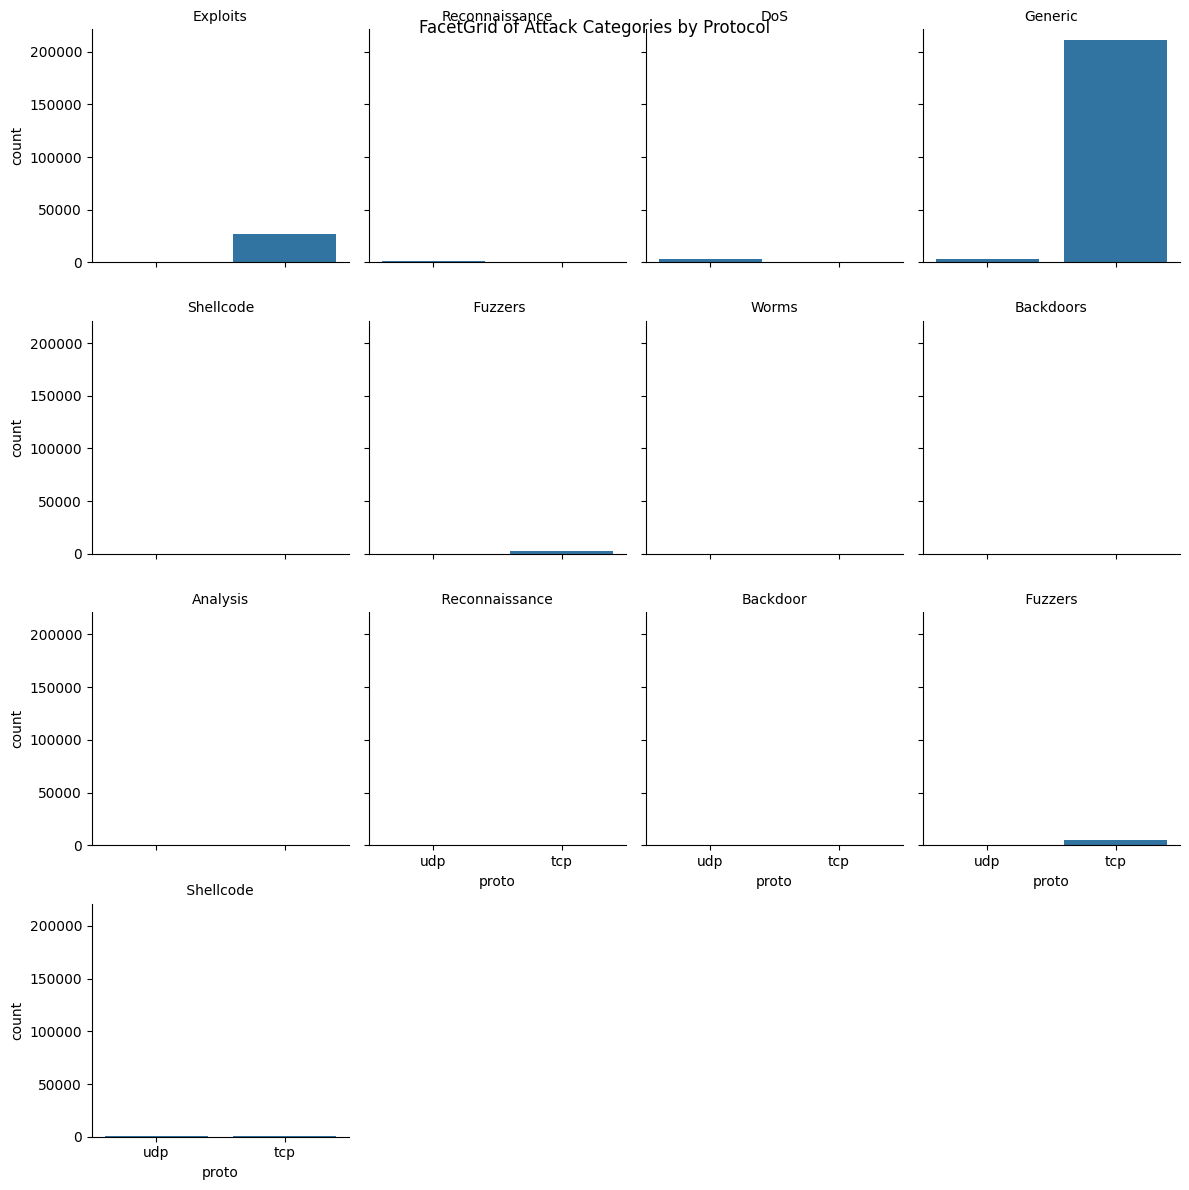

In [43]:
g = sns.FacetGrid(combined_data, col="attack_cat", col_wrap=4, height=3)
g.map(sns.countplot, 'proto')
g.set_titles("{col_name}")
plt.suptitle('FacetGrid of Attack Categories by Protocol')
plt.show()


# visualizing Categorical Features

In [9]:
cat_features = combined_data.columns[combined_data.dtypes == 'object']
cat_features

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

proto 
 {'tcp': 1495074, 'udp': 990435, 'unas': 16202, 'arp': 10064, 'ospf': 7798, 'sctp': 1525, 'icmp': 524, 'any': 411, 'gre': 324, 'rsvp': 274, 'ipv6': 272, 'mobile': 262, 'swipe': 262, 'sun-nd': 262, 'pim': 262, 'sep': 260, 'pri-enc': 137, 'etherip': 137, 'encap': 137, 'aes-sp3-d': 137, 'micp': 137, 'ipip': 137, 'ax.25': 137, 'mtp': 137, 'larp': 137, 'sprite-rpc': 137, 'eigrp': 137, 'tcf': 137, 'dgp': 137, 'gmtp': 137, 'ttp': 137, 'vines': 137, 'vmtp': 137, 'secure-vmtp': 137, 'iso-ip': 137, 'wb-expak': 137, 'wb-mon': 137, 'br-sat-mon': 137, 'pvp': 137, 'wsn': 137, 'cphb': 137, 'cpnx': 137, 'visa': 137, 'nsfnet-igp': 137, 'uti': 137, 'smp': 137, 'stp': 137, 'srp': 137, 'sm': 137, 'ib': 137, 'ddx': 137, 'l2tp': 137, 'isis': 137, 'crudp': 137, 'sccopmce': 137, 'sps': 137, 'fc': 137, 'pnni': 137, 'iatp': 137, 'pgm': 137, 'zero': 137, 'vrrp': 137, 'ipx-n-ip': 137, 'compaq-peer': 137, 'ipcomp': 137, 'snp': 137, 'scps': 137, 'a/n': 137, 'qnx': 137, 'aris': 137, 'ifmp': 137, 'pipe': 137, 

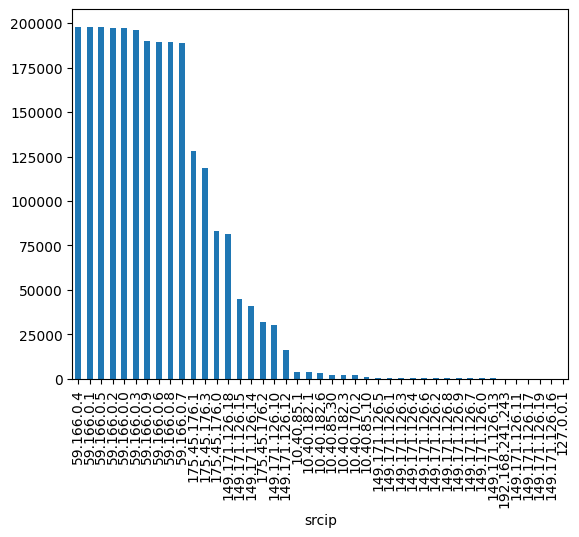

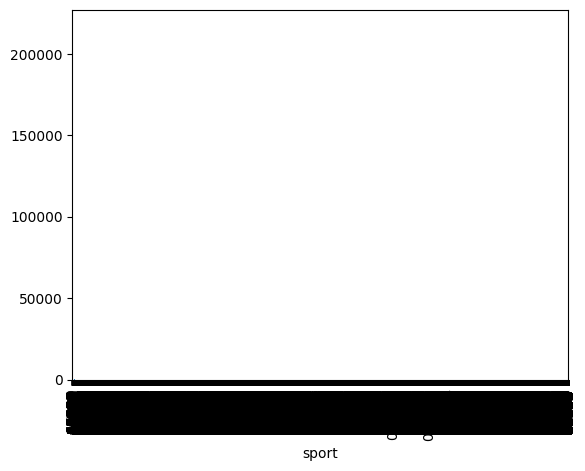

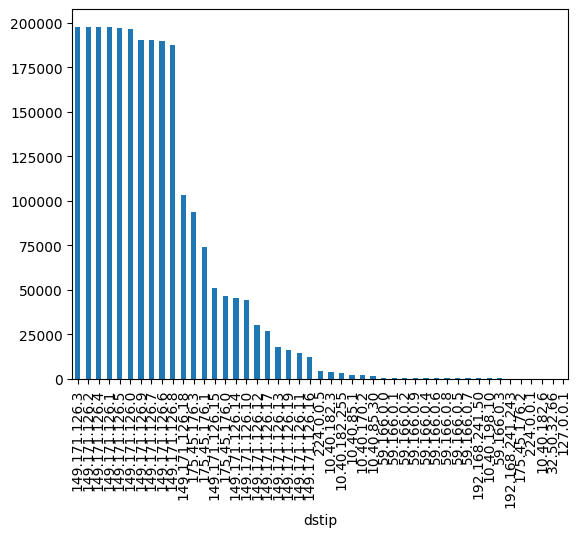

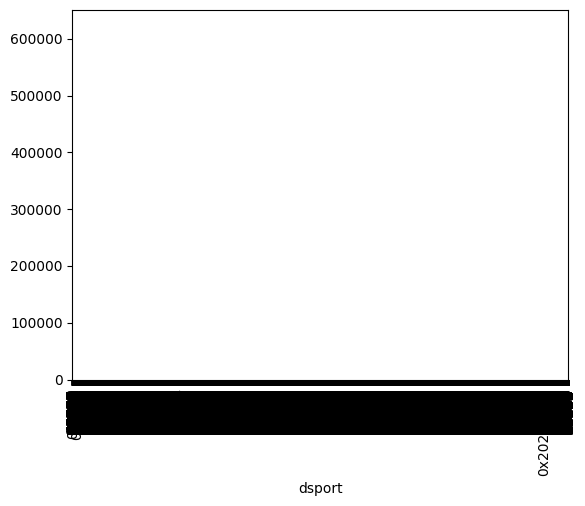

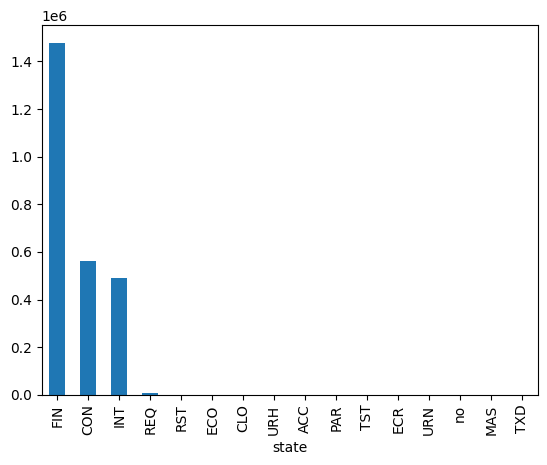

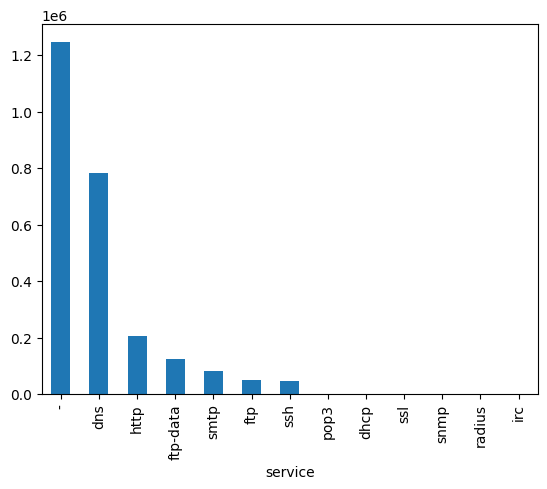

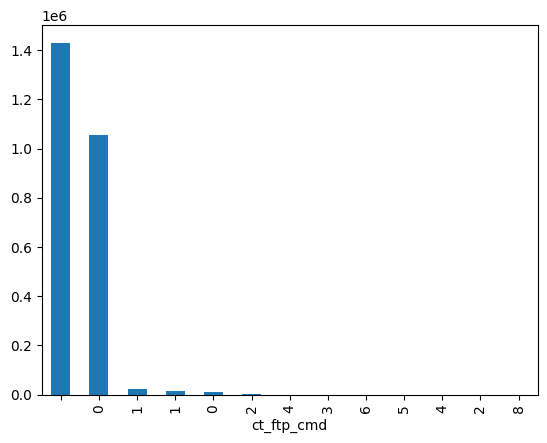

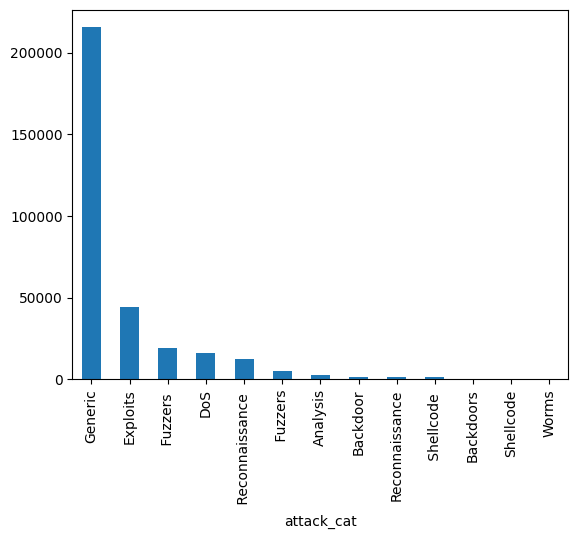

In [11]:
for i in cat_features:
    if i == 'proto':
        print(i, '\n', combined_data[i].value_counts().to_dict())
    else :
        plt.figure()
        combined_data[i].value_counts().plot.bar()

swin: Source TCP window advertisement,

dwin: Destination TCP window advertisement

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


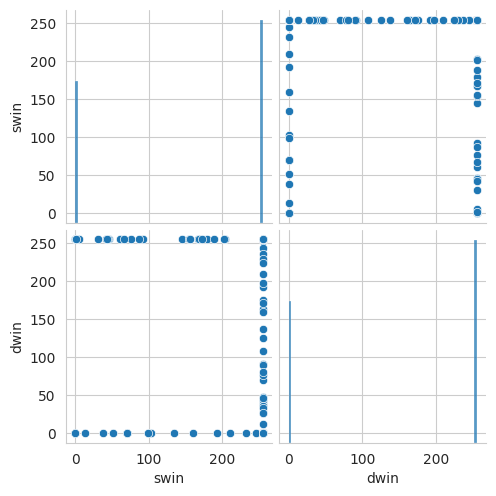

In [20]:
sns.set_style('whitegrid')
sns.pairplot(combined_data, vars=['swin', 'dwin'])
plt.show()